<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
        <h1>STATISTIEK IN PYTHON 2: DATA VISUALISEREN</h1> 
            <h2>CIRKEL- EN STAAFDIAGRAM</h2> 
    </font>
</div>

### Importeer de nodige modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<div>
    <font color=#690027 markdown="1">
        <h2>1. Inleiding: Happydata dataset</h2> 
    </font>
</div>

In deze notebook gebruik je de *happydata* dataset [1]. Deze dataset bevat de resultaten van een bevraging over hoe tevreden inwoners van Somerville zijn over verschillende voorzieningen in hun stad. Er werd bijvoorbeeld gepolst naar tevredenheid over de vastgoedprijzen en het onderhoud van de straten. De deelnemers konden antwoorden met *unhappy*, *rather unhappy*, *indifferent*, *rather happy* en *happy*; m.a.w. ontevreden, eerder ontevreden, onverschillig, eerder tevreden en tevreden. 

Tevredenheid over de vastgoedprijzen en het onderhoud van de straten zijn steekproefvariabelen. 
De steekproefvariabelen kunnen 5 waarden aannemen. 

Dit soort steekproefvariabelen is een **kwalitatieve variabele** (ook wel **categorische variabele** genoemd). Hierbij behoren de data tot een vast aantal verschillende categorieën en wordt er aan elk gegeven een categorie toegekend. 
Je kan dan per steekproefvaraibele ook de absolute en relatieve frequentie van elke categorie berekenen door te tellen hoeveel rijen tot een bepaalde categorie behoren.

Laad eerst zelf de *happydata* dataset in en laat ze zien op het scherm. Het bestand is opgeslagen op de locatie `data/happydata.csv`.

In [2]:
# voorbeeldcode
happydata = pd.read_csv("data/happydata.csv")
happydata

,infoavail,housecost,schoolquality,policetrust,streetquality,events,happy
0,indifferent,indifferent,indifferent,rather happy,rather unhappy,rather happy,unhappy
1,indifferent,rather unhappy,indifferent,happy,rather happy,indifferent,unhappy
2,happy,indifferent,indifferent,indifferent,indifferent,happy,happy
3,happy,rather happy,indifferent,indifferent,indifferent,happy,unhappy
4,happy,rather happy,indifferent,indifferent,indifferent,happy,unhappy
...,...,...,...,...,...,...,...
138,happy,indifferent,indifferent,unhappy,indifferent,happy,unhappy
139,happy,rather unhappy,indifferent,rather happy,rather unhappy,happy,happy
140,happy,indifferent,indifferent,rather happy,rather happy,happy,happy
141,rather happy,indifferent,indifferent,rather happy,rather happy,happy,unhappy


Aan de namen van de kolommen kan je zien welke steekproefvariabelen zijn: 
- tevredenheid over de informatie die verstrekt wordt over de stadsdiensten;
- tevredenheid over de vastgoedprijzen;
- de kwaliteit van de scholen;
- het vertrouwen in de politie;
- tevredenheid over de events die in de stad plaatsvinden;
- hoe men zich algemeen gesproken voelt.

Data wordt echter pas interessant als je er gewenste informatie kan uit afleiden.

<div class="alert alert-box alert-warning">
Kijk eens terug naar de vorige notebook <i>Statistiek in Python 1: Absolute en relatieve frequentie</i> als je niet meer weet hoe je een absolutefrequentietabel opstelt.
</div>

### Opdracht 1.1: Absolutefrequentietabel tevredenheid over de vastgoedprijzen

Je wil graag meer informatie over de tevredenheid van de inwoners over de vastgoedprijzen in hun stad. 
-  Bereken hiertoe de absolutefrequentietabel van de kolom `housecost`.
-  Sla ze op in de variabele `absolute_frequentie_vastgoed`.
-  Laat ze op het scherm zien.

In [3]:
# voorbeeldcode
vastgoed = happydata["housecost"]
absolute_frequentie_vastgoed = vastgoed.value_counts()
print(absolute_frequentie_vastgoed)

indifferent       46
rather unhappy    40
unhappy           30
rather happy      20
happy              7
Name: housecost, dtype: int64


### Opdracht 1.2: Verhoudingen

Het zou interessant zijn om te weten hoe verschillende groepen zich tot elkaar verhouden. 
-  Bereken wat de verhouding is van het aantal mensen dat *happy* heeft geantwoord tot het aantal mensen dat *unhappy* heeft geantwoord.

<div class="alert alert-block alert-danger"> 
Je kan dit met de hand uitrekenen. Maar je kan hiervoor natuurlijk ook Python gebruiken.
</div>

In [4]:
# voorbeeldcode
absolute_frequentie_unhappy = absolute_frequentie_vastgoed["unhappy"]
absolute_frequentie_happy = absolute_frequentie_vastgoed["happy"]

print(absolute_frequentie_happy/absolute_frequentie_unhappy)

0.23333333333333334


Antwoord: De verhouding van *happy* tot *unhappy* is 0,23.

Doe hetzelfde voor de andere categorieën.

-  Bereken de verhouding van het aantal keer *rather unhappy* tot het aantal keer *unhappy*.

In [5]:
# voorbeeldcode
absolute_frequentie_rather_unhappy = absolute_frequentie_vastgoed["rather unhappy"]

print(absolute_frequentie_rather_unhappy/absolute_frequentie_unhappy)

1.3333333333333333


Antwoord:

Antwoord: De verhouding van *rather unhappy* tot *unhappy* is 1,33.

- Bereken de verhouding van het aantal keer *indifferent* tot het aantal keer *unhappy*.

In [6]:
# voorbeeldcode
absolute_frequentie_indifferent = absolute_frequentie_vastgoed["indifferent"]

print(absolute_frequentie_indifferent/absolute_frequentie_unhappy)

1.5333333333333334


Antwoord:

Antwoord: De verhouding van *indifferent* tot *unhappy* is 1,53.

-  Bereken de verhouding van het aantal keer *rather happy* tot het aantal keer *unhappy*.

In [7]:
# voorbeeldcode
absolute_frequentie_rather_happy = absolute_frequentie_vastgoed["rather happy"]

print(absolute_frequentie_rather_happy/absolute_frequentie_unhappy)

0.6666666666666666


Antwoord:

Antwoord: De verhouding van *rather happy* tot *unhappy* is 0,67.

<div>
    <font color=#690027 markdown="1">
        <h2>2. Cirkeldiagram</h2> 
    </font>
</div>

Dit was eentonig en wellicht geen aangenaam werk. Bovendien is kijken naar een reeks getallen niet zo aantrekkelijk, en verget het wat moeite om de verhoudingen juist in te schatten. Door de informatie uit de dataset te visualiseren in een diagram kan al veel informatie snel duidelijk worden.

Er zijn een hele hoop mogelijkheden om diagrammen te tekenen met Python. Een gemakkelijke manier in deze context is om de `plot()`-functie uit de pandas-module toe te passen op een absolutefrequentietabel. <br>
Je kan dan via de parameter `kind` aangeven wat voor diagram je wilt tekenen. Door `kind="pie"` in te vullen teken je bijvoorbeeld een **cirkeldiagram** (**taartdiagram**).

### Voorbeeld 2.1

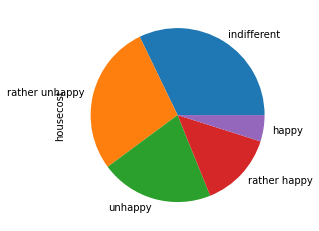

In [8]:
plt.figure()

absolute_frequentie_vastgoed.plot(kind="pie")  # teken cirkeldiagram van de tevredenheid over vastgoedprijzen

plt.show()

In een oogopslag haal je nu heel wat informatie uit de data. In dit diagram lees je bv. af dat het aantal mensen die 'happy' antwoordden in de minderheid zijn.

### Voorbeeld 2.2

Je kan de voorstelling nog verbeteren door het label dat links staat te verwijderen en door bovenaan een titel toe te voegen. Je kan de figuur ook groter maken.<br>
Ken daarvoor waarden toe aan de parameters `title` en `label` van de functie `plot()`.

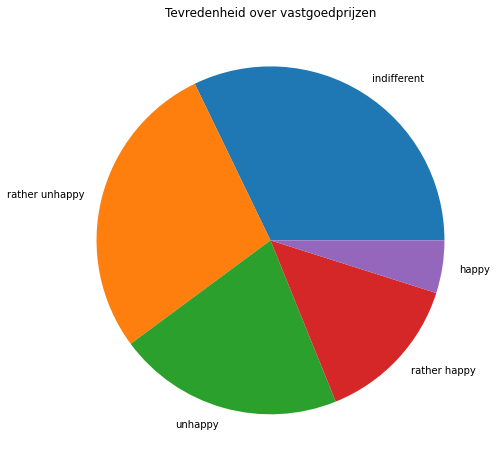

In [9]:
plt.figure(figsize=(8,8))

absolute_frequentie_vastgoed.plot(kind="pie", title="Tevredenheid over vastgoedprijzen", label="")  # Teken hetzelfde cirkeldiagram met titel

plt.show()

### Opdracht 2.1

Genereer zelf een cirkeldiagram van de tevredenheid van de bewoners over de onderwijskwaliteit. Die kan je vinden in de kolom `schoolquality` in de `happydata` dataset. Kies ook een gepaste titel.

<div class="alert alert-block alert-info"> 
    Tip: Herinner je dat je om een cirkeldiagram te genereren de absolute frequentietabel nodig hebt. 
</div>

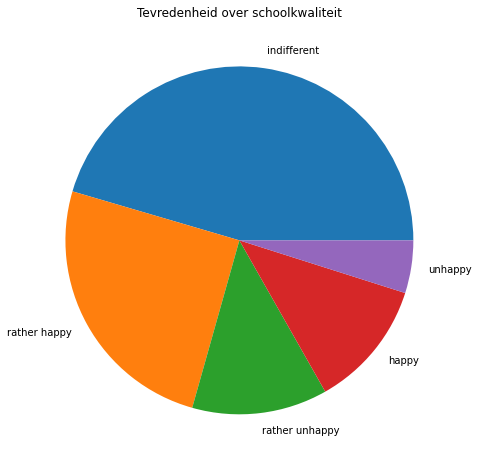

In [10]:
# voorbeeldcode
onderwijskwaliteit = happydata["schoolquality"]
absolute_frequentietabel_onderwijskwaliteit = onderwijskwaliteit.value_counts()

plt.figure(figsize=(8,8))

absolute_frequentietabel_onderwijskwaliteit.plot(kind="pie", title="Tevredenheid over schoolkwaliteit", label="")

plt.show()

<div>
    <font color=#690027 markdown="1">
        <h2>3. Staafdiagram</h2> 
    </font>
</div>

<div class="alert alert-box alert-warning">
Kijk eens terug naar de vorige notebook <i>Statistiek in Python 1: Absolute en relatieve frequentie</i> als je niet meer weet hoe je een relatieve frequentietabel opstelt.
</div>

### Voorbeeld 3.1: Staafdiagram van de relatieve frequentie van de steekproefvariabele happy

Onderstaand staafdiagram stelt de relatieve frequentie voor van de kolom `happy`, die de algemene tevredenheid weergeeft. 

<img src="images/happykolom.png" width="400"/>

Dit diagram geeft de indruk dat de mensen veel vaker gelukkig invulden dan ongelukkig. Het verschil is in de realiteit echter veel kleiner. De ongelukkige keuze voor de waarden op de verticale as zorgt voor een **vertekend beeld**. In de media wordt dit nochtans vaak gedaan om de aandacht van de lezer te krijgen. De lezer wordt zo bewust of onbewust misleid. 

Een van de instructies om dit diagram te bekomen, was: <br>
`relatieve_frequentie_algemeen.plot(kind="bar", ylim=(0.45,0.55))`

### Opdracht 3.1: Staafdiagram van de relatieve frequentie van de steekproefvariabele happy

- Herteken het diagram met Python en maak zelf keuze voor een duidelijke verticale as. 
- Zorg dat het diagram een titel heeft.
- Label beide assen duidelijk a.d.h.v. de parameters `xlabel` en `ylabel`.

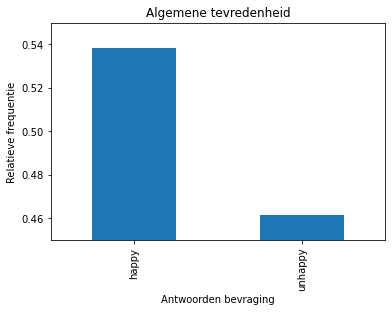

In [11]:
# voorbeeldcode
algemeen = happydata["happy"]
absolute_frequentie_algemeen = algemeen.value_counts()
relatieve_frequentie_algemeen = absolute_frequentie_algemeen/len(happydata)

plt.figure()

relatieve_frequentie_algemeen.plot(kind="bar", ylim=(0.45,0.55), title="Algemene tevredenheid", xlabel="Antwoorden bevraging", ylabel="Relatieve frequentie")

plt.show()

<div class="alert alert-box alert-warning">
De categorieën op de x-as kan je ook opvatten als numeriek, een gradatie gaande van 1 tot 5. Je zou dan een histogram kunnen tekenen en de gemiddelde tevredenheid bepalen die uit de enquête tevoorschijn komt.    
</div>

<div class="alert alert-box alert-warning">
De module pandas heeft nog vele andere opties om diagrammen op te maken, te veel om in dit notebook uit te leggen. Je kan eens kijken in de online documentatie van pandas en een aantal opties zelf uitproberen: 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html">https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html</a>
    

</div>

### Referentielijst

[1] Priyanshu Sethi. Happiness Classification Dataset. https://www.kaggle.com/datasets/priyanshusethi/happiness-classification-dataset<br>
Deze dataset is gebaseerd op [2].<br>

[2] Waldemar Koczkodaj. Somerville Happiness Survey. CC BY 4.0.
https://archive.ics.uci.edu/dataset/479/somerville+happiness+survey <br>
Deze dataset is gebaseerd op [3].<br>

[3] Somerville Happiness Survey Responses. Public access and use.
https://catalog.data.gov/dataset/somerville-happiness-survey-responses<br>

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>

Notebook Python in wiskunde - Statistiek, van D. De Bolster, F. wyffels & N. Gesquière, in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>.